In [1]:
import pandas as pd
from matplotlib.ticker import FuncFormatter
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('final.csv')

In [3]:
df.drop(columns = ['Unnamed: 0.1','Unnamed: 0'],inplace = True)

In [4]:
country_tb = df.groupby('location').agg({
    'population':'max'
})

In [5]:
country_tb.sort_values(by = 'population',ascending=False,inplace=True)

In [6]:
p1 = country_tb.head(6)

In [7]:
p1

,population
location,
China,1425887360
India,1417173120
United States,338289856
Brazil,215313504
Russia,144713312
Japan,123951696


In [8]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


Text(0.5, 0.98, 'Population Comparisons Of Top 6 Countries')

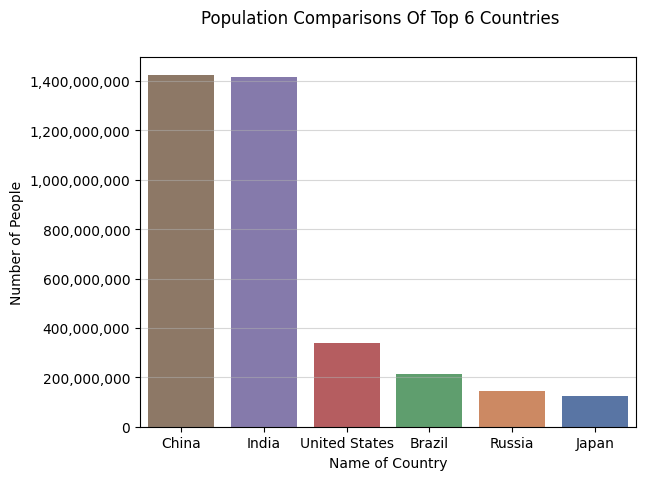

In [9]:
sns.barplot(data = p1,x = 'location',y = 'population',hue = 'population',palette='deep')
plt.legend().set_visible(False)
plt.grid(True,axis = 'y',alpha = 0.5)
plt.style.use('seaborn-v0_8-paper')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x,_ :f'{int(x):,}'))
plt.xlabel('Name of Country')
plt.ylabel('Number of People')
plt.suptitle('Population Comparisons Of Top 6 Countries')

In [11]:
df['date'] = pd.to_datetime(df['date'])

In [12]:
df['year_month'] = df['date'].dt.to_period('M')

In [13]:
df_new_cases = df.groupby('year_month').agg({
    'new_cases':'sum'
})

In [14]:
df_new_cases.reset_index(inplace=True)

In [15]:
df_new_cases['month_start'] = df_new_cases['year_month'].dt.to_timestamp()

In [16]:
df_new_cases

,year_month,new_cases,month_start
0,2020-01,2012.0,2020-01-01
1,2020-02,75950.0,2020-02-01
2,2020-03,424535.0,2020-03-01
3,2020-04,1375739.0,2020-04-01
4,2020-05,1914067.0,2020-05-01
5,2020-06,2201288.0,2020-06-01
6,2020-07,3885874.0,2020-07-01
7,2020-08,6258554.0,2020-08-01
8,2020-09,5512607.0,2020-09-01
9,2020-10,5966869.0,2020-10-01


In [17]:
df_new_cases['month_no'] = df_new_cases['month_start'].dt.month

In [18]:
df_new_cases.drop(columns = 'month_no',inplace=True)

In [19]:
df_new_cases['month_name'] = df_new_cases['month_start'].dt.strftime('%b')

In [20]:
df_new_cases['year'] = df_new_cases['month_start'].dt.year

In [21]:
df_2020 = df_new_cases[df_new_cases['year'] == 2020]

In [23]:
df_2021 = df_new_cases[df_new_cases['year'] == 2021]
df_2022 = df_new_cases[df_new_cases['year'] == 2022]
df_2023 = df_new_cases[df_new_cases['year'] == 2023]
df_2024 = df_new_cases[df_new_cases['year'] == 2024]

In [24]:
df_2020

,year_month,new_cases,month_start,month_name,year
0,2020-01,2012.0,2020-01-01,Jan,2020
1,2020-02,75950.0,2020-02-01,Feb,2020
2,2020-03,424535.0,2020-03-01,Mar,2020
3,2020-04,1375739.0,2020-04-01,Apr,2020
4,2020-05,1914067.0,2020-05-01,May,2020
5,2020-06,2201288.0,2020-06-01,Jun,2020
6,2020-07,3885874.0,2020-07-01,Jul,2020
7,2020-08,6258554.0,2020-08-01,Aug,2020
8,2020-09,5512607.0,2020-09-01,Sep,2020
9,2020-10,5966869.0,2020-10-01,Oct,2020


In [25]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [26]:
from matplotlib.ticker import FuncFormatter

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

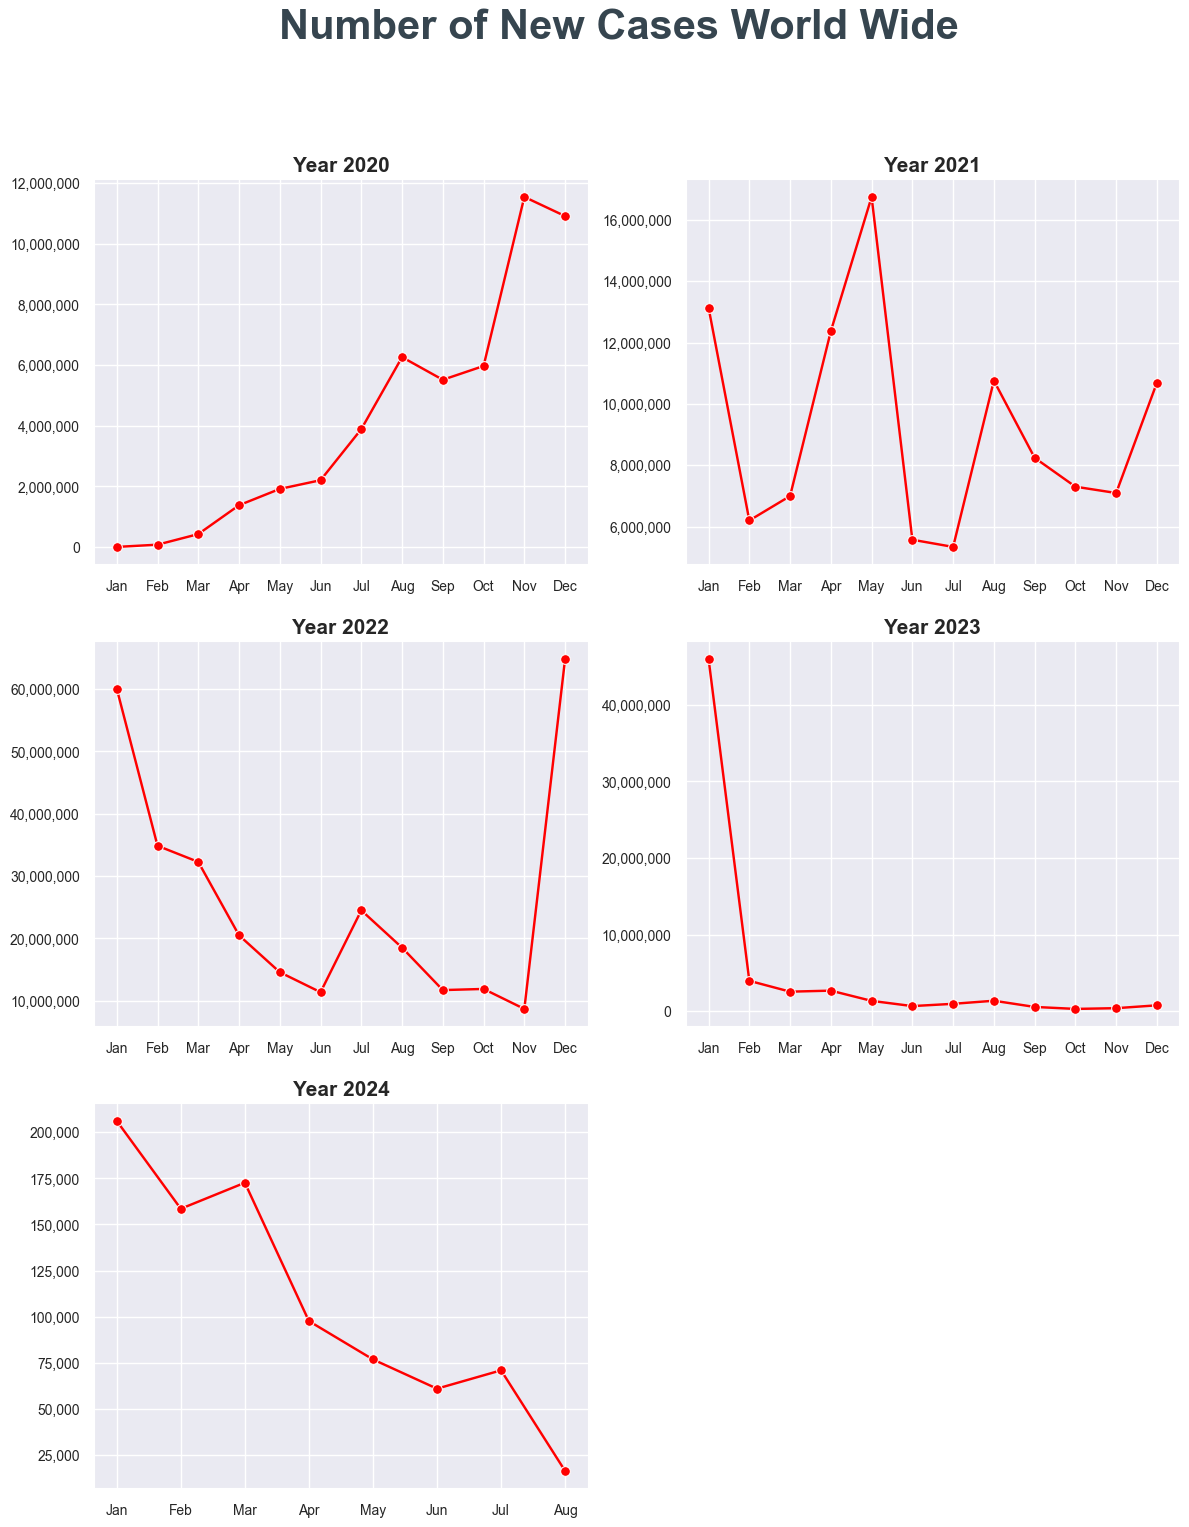

In [29]:
fig,ax = plt.subplots(3,2,figsize = (14,17))
plt.style.use('seaborn-v0_8-notebook')
plt.suptitle('Number of New Cases World Wide',fontsize = 30,fontweight = 'bold',color = '#36454F')

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')


sns.lineplot(data = df_2020,x = 'month_name',y = 'new_cases',ax = ax[0,0],color = 'red',marker = 'o')
ax[0,0].yaxis.set_major_formatter(formatter)
ax[0,0].set_title('Year 2020',fontweight = 'bold',fontsize = 15)
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('')
sns.set_style('darkgrid')

# *********************************
sns.lineplot(data = df_2021,x = 'month_name',y = 'new_cases',ax = ax[0,1],color = 'red',marker = 'o')
ax[0,1].yaxis.set_major_formatter(formatter)
ax[0,1].set_title('Year 2021',fontweight = 'bold',fontsize = 15)
ax[0,1].set_xlabel('')
ax[0,1].set_ylabel('')
sns.set_style('darkgrid')
# **********************************
sns.lineplot(data = df_2022,x = 'month_name',y = 'new_cases',ax = ax[1,0],color = 'red',marker = 'o')
ax[1,0].yaxis.set_major_formatter(formatter)
ax[1,0].set_title('Year 2022',fontweight = 'bold',fontsize = 15)
ax[1,0].set_xlabel('')
ax[1,0].set_ylabel('')
sns.set_style('darkgrid')
# ***********************************
sns.lineplot(data = df_2023,x = 'month_name',y = 'new_cases',ax = ax[1,1],color = 'red',marker = 'o')
ax[1,1].yaxis.set_major_formatter(formatter)
ax[1,1].set_title('Year 2023',fontweight = 'bold',fontsize = 15)
ax[1,1].set_xlabel('')
ax[1,1].set_ylabel('')
sns.set_style('darkgrid')
# ***********************************
sns.lineplot(data = df_2024,x = 'month_name',y = 'new_cases',ax = ax[2,0],color = 'red',marker = 'o')
ax[2,0].yaxis.set_major_formatter(formatter)
ax[2,0].set_title('Year 2024',fontweight = 'bold',fontsize = 15)
ax[2,0].set_xlabel('')
ax[2,0].set_ylabel('')
sns.set_style('darkgrid')
ax[2,1].axis('off')



**Common comparision of all 5 years Using lineplot**

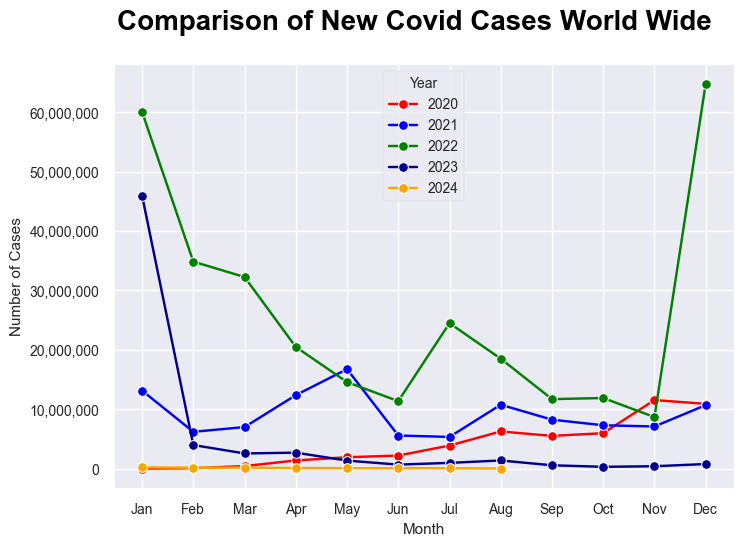

In [31]:
fig,ax = plt.subplots(1,1)
sns.lineplot(data = df_2020,x = 'month_name',y = 'new_cases',ax = ax,color = 'red',marker = 'o')
sns.lineplot(data = df_2021,x = 'month_name',y = 'new_cases',ax = ax,color = 'blue',marker = 'o')
sns.lineplot(data = df_2022,x = 'month_name',y = 'new_cases',ax = ax,color = 'green',marker = 'o')
sns.lineplot(data = df_2023,x = 'month_name',y = 'new_cases',ax = ax,color = 'darkblue',marker = 'o')
sns.lineplot(data = df_2024,x = 'month_name',y = 'new_cases',ax = ax,color = 'orange',marker = 'o')
sns.set_style('darkgrid')
# plt.grid(True)
plt.suptitle('Comparison of New Covid Cases World Wide',fontsize = 20,fontweight = 'bold',color = 'black' )
lines = ax.get_lines()
plt.ylabel('Number of Cases')
plt.xlabel('Month')
ax.legend(lines,[2020,2021,2022,2023,2024],title = 'Year')
ax.yaxis.set_major_formatter(formatter)
